In [1]:
import sys
sys.path.insert(0, "../")
import time

from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [2]:
## This is the folder that holds recent observations by wfc3 on HST in a SNAP program

inFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/'
configFolder = '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/config/'

name = "u03396"

### Checking out the log file

In [3]:
inFolder = inFolder + '/'
configFolder   = configFolder + '/'

outFolder = "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"


if exists(logFile):
    with open(logFile, 'r') as f:
        line = f.readline()

    if line.strip("#").strip()[:4] == "uuid":
        old_uuid = line.strip("#").split(":")[1].strip()                   
        if os.path.isdir(outFolder+name+"_"+old_uuid):
            uuid = old_uuid
            params = get_obj_params(open_log_df(logFile))

else:
    print("There is no log-file. \nPlease run elliprof to generate the log file and the relevant plots.")
    print("Elliprof notebook name: \"Run_elliprof_function.ipynb\"")

In [4]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [5]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


In [6]:
Dmask = inFolder + "{}/{}j.dmask".format(name, name)
Dmask

'/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262//u03396/u03396j.dmask'

In [7]:
r_aperture = 20  # [pix] radius of the avoding zone

# used Dmask instead of mask1
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

catal_df.head()

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,297.076,30.322,92.605841,79.923949,-11.8529,0.0236,3.090,2.145,-67.0,...,0.0259,0.0,6489584.0,0.0,0.0,-11.6375,0.0165,-11.8587,0.0290,595.695711
1,2,563.411,31.122,92.572954,79.915732,-12.4515,0.0090,1.722,1.678,-80.7,...,0.0053,0.0,6489584.0,0.0,0.0,-12.3965,0.0081,-12.4592,0.0113,532.112019
2,3,513.362,29.676,92.579335,79.917252,-12.2352,0.0297,2.603,1.584,-87.5,...,0.0800,0.0,6489584.0,0.0,0.0,-10.6498,0.0368,-11.7085,0.0521,535.886880
3,4,151.369,26.136,92.624450,79.928371,-10.4006,0.0645,1.434,0.901,63.3,...,0.0604,0.0,6489584.0,0.0,0.0,-9.6559,0.0483,-10.0803,0.0893,676.856741
4,5,489.298,13.607,92.584841,79.917688,-11.2102,0.0479,1.695,1.059,64.8,...,0.0809,0.0,6489584.0,0.0,0.0,-10.1105,0.0466,-11.1032,0.0687,554.582185


## Ds9

Open ds9 and wait for its window to fully appear

In [8]:
os.system("ds9 "+sex_mask+" &")

0

### Regions Guid

- green: extended opbject
- red: star, point source
- cyan: ignored
- yellow: avoding zone

In [9]:
r_aperture = 40   # [pix] radius of the avoding zone

catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=2.0,
                                       r_aperture = r_aperture,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

make_se_lkn(catal_df, model=0, star_f=0.8, r_aperture=r_aperture, **Config)

os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")

Outputs_u03396/u03396_bb6d9894f133/obj.000.pro
wrote:  Outputs_u03396/u03396_bb6d9894f133/se_lknj.000
# of GCs:  123
# of galaxies:  824


0

In [9]:
sex_mask

'Outputs_u03396/u03396_bb6d9894f133//mask_sej.000'

- yellow: ignore
- cyan: point sources
- green: galaxies, extended objects

## Ds9 

In [11]:
# http://ds9.si.edu/doc/ref/xpa.html
os.system("xpaset -p ds9 regions delete all")
os.system("xpaset -p ds9 regions ./ds9.reg &")


# set image scale
os.system("xpaset -p ds9 scale linear &")
os.system("xpaset -p ds9 scale limits -4100 200000 &")

0

## Deleting / Loading Regions

In [21]:
try:
    if rm:
        os.system("xpaset -p ds9 regions delete all")
        rm=False
    else:
        os.system("xpaset -p ds9 regions ./ds9.reg &")
        rm=True
except:
    rm = False


In [13]:
## create the maks of the extended objects + Dmask --> dophot

## Visualizations

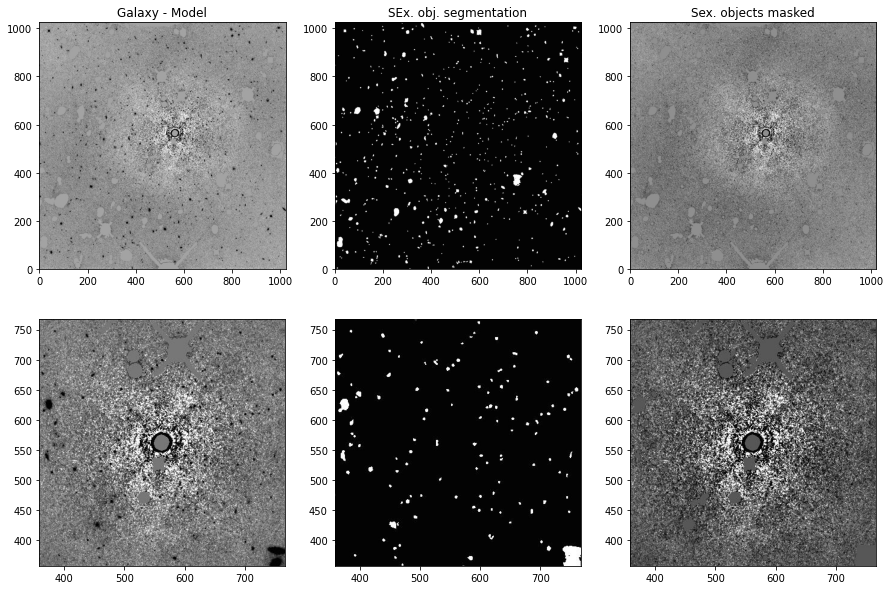

In [12]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


ax1 = tv(residual, ax=AX[0][0])
ax2 = tv(sex_objname, ax=AX[0][1])
ax3 = tv(sex_masked, ax=AX[0][2], options='')

ax1.set_title("Galaxy - Model")
ax2.set_title("SEx. obj. segmentation")
ax3.set_title("Sex. objects masked")

zoom = 5
ax1 = tv(sex_mask, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
ax2 = tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
ax3 = tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')

In [11]:
residual

'Outputs_u03396/u03396_bb6d9894f133//resid.000'

In [17]:
os.system("ds9 "+sex_masked+" &")

0

In [19]:
os.system("ds9 "+sex_mask+"  "+sex_objname+" &")

0